**DSCI 100: Project Final Report**
===
---

Introduction:
---

A research group led by Frank Wood has set up a Minecraft server to examine how people play video games. The data collected involves player characteristics and play times. Here, we ask a predictive question based on this data, to explore potential trends and relationships between players with similar traits.

Specifically, we ask *"<u>Can player age and hours played predict whether a player will subscribe to the video game newsletter?</u>"*

To do this, we use the *players.csv* dataset, which contains seven variables and 196 observations. These variables include
* *experience* (chr): Player's level of in-game experience.
* *subscribe* (lgl): Whether player is subscribed to the newsletter or not.    
* *hashedEmail* (chr): Player's hashed email.  
* *played_hours* (dbl): Player's number of hours played.  
* *name* (chr): Player's name.  
* *gender* (chr): Player's gender.  
* *Age* (dbl): Player's age.

Methods & Results:
---

* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
* your report should include code which:
    - loads data
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis
    - note: all figures should have a figure number and a legend

The data was read as a .csv file using a URL from a GitHub repository. To prepare the data for answering the predictive question, the predictors and response variables, *Age*, *played_hours*, and *subscribe*, were selected and the response variable was set to a factor *(fct)* type to be used in a classification setting.

The specific question was answered with K-NN classification, as the response variable is not numeric but rather composed of two distinct values, *TRUE* and *FALSE*, meaning it is categorical.

The data was split into 75% training data and 25% testing data so that it could be trained on a large portion of data and still evaluated on a considerable portion of the data. Also, the use of 5-fold cross-validation with a set randomisation seed gave the model more robust data to operate on. To improve the model, a value of K was selected that maximised the model's accuracy. This K value came from the range 1 to 10, to allow for a reasonable array of options, while not greatly slowing the time it takes the model to tun. The predictors were scaled and centred on avoiding issues with one predictor unintentionally outweighing the other in the process of nearest neighbours scaling.

With this value K and a multi-fold framework, the K-NN classification was performed. Then, the quality of the model was assessed by its metrics on the test data and the effectiveness of the model was visualised with plots of accuracy.

The variables *Age* and *played_hours* were selected due to their numeric type and because it seems interesting to explore whether there is a relation between these characteristics of a player and whether or not they will subscribe to a game-related newsletter. This addresses interesting questions, such as whether different ages tend to subscribe to newsletters relating to games they like or how much a person might play before becoming involved enough in a gaming community to subscribe to a game-related newsletter.

---

**Loading in the library for wrangling and classification and reading in the players.csv dataset.**

In [2]:
library(tidyverse)
players_url <- "https://raw.githubusercontent.com/Rafee1012/dsci-100-group-project-10/refs/heads/main/players%20(3).csv"
players <- read_csv(players_url)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


---

Wrangling data into a necessary format for answering the predictive question.

In [3]:
players <- players |>
    select(Age, played_hours, subscribe) |>
    mutate(subscribe = as_factor(subscribe))

head(players)

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE


---

**Summarising data relevant for planned analysis.**

Predictor Variables:
- *Age* (dbl)
- *played_hours* (dbl)

These predictors were chosen to explore if they share any meaningful relationship in predicting subscription status, as it seems interesting to see whether players of different ages and time spent playing are more likely to become involved in the community surrounding a game they enjoy and subscribe to a game-related newsletter.

Response Variable: *subscribe* (fct)

This code shows that people with no playtime are never subscribed, meaning those players can be filtered out and disregarded from the planned analysis.

In [4]:
players |>
    filter(played_hours == 0, subscribe == TRUE) |>
    nrow()

[1] 58

TABLE 1: Summary Statistics for Response Variable *subscribe*:

In [5]:
total <- players |>
    mutate(total = n()) |>
    slice_head(n = 1) |>
    pull()

options <- players |>
    group_by(subscribe) |>
    summarize(count = n(),
              "distribution (%)" = n() / total * 100)

options

subscribe,count,distribution (%)
<fct>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


TABLE 2: Summary Statistics for Predictor *Age*:

In [6]:
summary_Age <- players |>
    mutate(mean_age = mean(Age, na.rm = TRUE), mode_age = mode(Age), med_age = median(Age, na.rm = TRUE),
           sd_age = sd(Age, na.rm = TRUE), min_age = min(Age, na.rm = TRUE), max_age = max(Age, na.rm = TRUE)) |>
    select(-played_hours, -subscribe, -Age) |>
    slice_head(n = 1)

summary_Age

mean_age,mode_age,med_age,sd_age,min_age,max_age
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,numeric,19,6.174667,8,50


TABLE 3: Summary Statistics for Predictor *played_hours*:

In [7]:
summary_played_hours <- players |>
    mutate(mean_played_hours = mean(played_hours, na.rm = TRUE), mode_played_hours = mode(played_hours),
           med_played_hours = median(played_hours, na.rm = TRUE), sd_played_hours = sd(played_hours, na.rm = TRUE),
           min_played_hours = min(played_hours, na.rm = TRUE), max_played_hours = max(played_hours, na.rm = TRUE)) |>
    select(-played_hours, -subscribe, -Age) |>
    slice_head(n = 1)

summary_played_hours

mean_played_hours,mode_played_hours,med_played_hours,sd_played_hours,min_played_hours,max_played_hours
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,numeric,0.1,28.35734,0,223.1


---

**Visualising data relevant for planned analysis.**

FIGURE 1: Plot of Player Age vs. Player In-Game Playtime, Coloured by Player Subscription Status

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


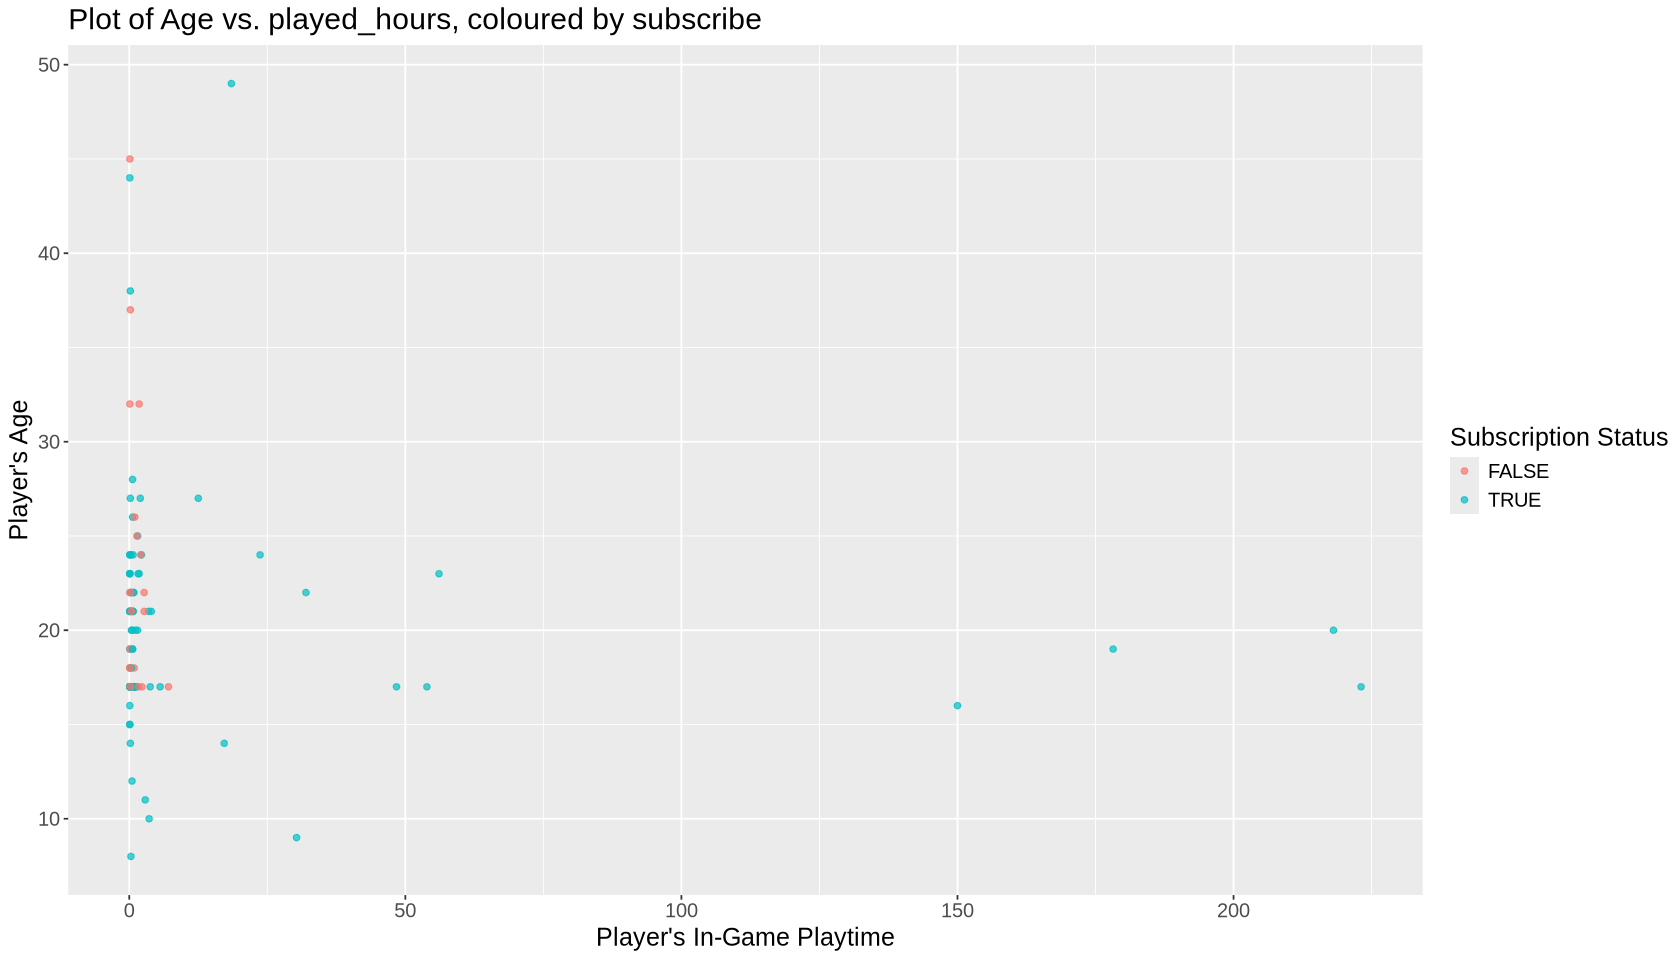

In [8]:
options(repr.plot.height = 8, repr.plot.width = 14)

prediction_plot <- players |>
    filter(played_hours > 0) |>
    mutate(subscribe = as_factor(subscribe)) |>
    ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
        geom_point(alpha = 0.7) +
        labs(x = "Player's In-Game Playtime", y = "Player's Age", color = "Subscription Status") +
        ggtitle("Plot of Age vs. played_hours, coloured by subscribe") +
        theme(text = element_text(size = 15))

prediction_plot

---

**Performing K-NN classification to answer the predictive question.**

- Adding necessary libraries for wrangling and predicting
- Setting seed to control randomisation
- Reading in data as .csv file
- Converting data to format suitable for K-NN classification

In [9]:
# reading in libraries
library(tidyverse)
library(tidymodels)

# setting randomisation seed
set.seed(50)

# reading in data and wrangling, removing NA values to avoid issues with splitting data
players_url <- "https://raw.githubusercontent.com/Rafee1012/dsci-100-group-project-10/refs/heads/main/players%20(3).csv"
players <- read_csv(players_url) |>
    select(Age, played_hours, subscribe) |>
    mutate(subscribe = as_factor(subscribe)) |>
    filter(Age != "NA") |>
    filter(played_hours > 0)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column spe

- Splitting data into training and testing data

In [10]:
set.seed(50)

#splitting data into testing and training data
player_split <- initial_split(players, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

- Creating recipe and standardising data to avoid unwanted biases among predictors
- Creating model specification for classification, setting weight_func to consider each data point equally, and tuning neighbours to determine best value of K
- Creating fold for 5-fold cross validation to produce more robust data to train model on
- Creating grid of potential values of K to be tested
- Putting elements into workflow
- Collecting metrics of different values of K

In [11]:
set.seed(50)

# creating recipe and scaling data (on training data)
player_recipe <- recipe(subscribe ~ Age + played_hours, data = player_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# creating model specification with tuning to choose K value
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# creating vfold for 5-fold cross validation (on training data)
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

# creating grid of K values to deterimine best K value
grid_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# putting elements into a workflow
player_fit <- workflow() |>
    add_model(player_spec) |>
    add_recipe(player_recipe) |>
    tune_grid(resamples = player_vfold, grid = grid_vals)

- Determining value of K that maximises accuracy (either K = 7 or K = 8 both result in the same accuracy)

In [12]:
set.seed(50)

# finding value of K that minimises RMSE
K_metrics <- player_fit |>
    collect_metrics() |>
    filter(.metric == "accuracy")

best_K <- K_metrics |>
    slice_max(mean, n = 1) |>
    pull(neighbors)
best_K

[1] 7 8

- Visualising accuracy vs value of K plot (this shows peak near K = 7)

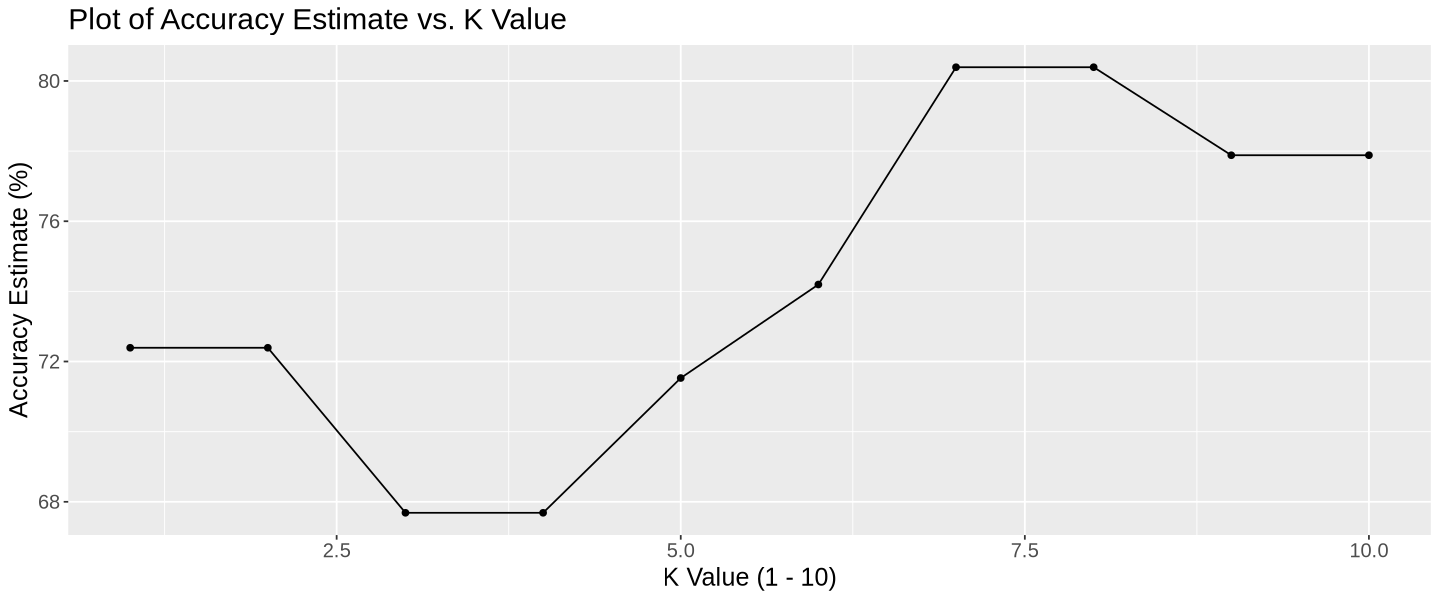

In [13]:
options(repr.plot.height = 5, repr.plot.width = 12)

K_plot <- K_metrics |>
    mutate(mean = mean * 100) |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "K Value (1 - 10)", y = "Accuracy Estimate (%)") +
        ggtitle("Plot of Accuracy Estimate vs. K Value") +
        theme(text = element_text(size = 15))
K_plot

- Recreating model specification with new value of K
- Creating new workflow with new model specification

In [14]:
set.seed(50)

# creating model specification with K = 7
player_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification")

# recreating workflow with new model specification
player_fit2 <- workflow() |>
    add_model(player_spec2) |>
    add_recipe(player_recipe) |>
    fit(data = player_train)

- Predicting on test data
- Evaluating performance of model on test data using metrics

In [15]:
set.seed(50)

# predicting on test data
player_predict <- player_fit2 |>
    predict(player_test) |>
    bind_cols(player_test)

# determining model accuracy on test data in percent
player_accuracy <- player_predict |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    mutate(.estimate = .estimate * 100) |>
    pull(.estimate)

player_accuracy



[1] 78.57143

- Showing confusion matrix, switching positive and negative labels with event_level

In [24]:
player_confusion_matrix <- player_predict |>
    conf_mat(truth = subscribe, estimate = .pred_class, event_level = "second")

player_confusion_matrix

          Truth
Prediction FALSE TRUE
     FALSE     1    0
     TRUE      6   21

- Showing precision in percent, switching positive and negative labels with event_level

In [25]:
player_precision <- player_predict |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second") |>
    mutate(.estimate = .estimate * 100) |>
    pull(.estimate)

player_precision

[1] 77.77778

- Showing recall in percent switching positive and negative labels with event_level

In [26]:
player_recall <- player_predict |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second") |>
    mutate(.estimate = .estimate * 100) |>
    pull(.estimate)

player_recall

[1] 100

---

**Visualising data analysis of K-NN classification.**

Discussion:
---
* summarize what you found
* discuss whether this is what you expected to find?
* discuss what impact could such findings have?
* discuss what future questions could this lead to?

References:
---
* You may include references if necessary, as long as they all have a consistent citation style.